#Data Analysis on covid-19 data set

In [1]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the data set
covid_df=pd.read_csv("/content/drive/MyDrive/Python project/covid_19_india.csv")

In [3]:
#check first 5 records
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
#drop unwanted columns from data set
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [5]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [6]:
#check data types of all the columns
covid_df.dtypes

Date                    object
State/UnionTerritory    object
Cured                    int64
Deaths                   int64
Confirmed                int64
dtype: object

In [7]:
#check null values in data set column
covid_df.isnull().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [8]:
#check all states present in data set
covid_df["State/UnionTerritory"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [9]:
#counts the frequency of the state
covid_df["State/UnionTerritory"].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [10]:
#format the date column
covid_df["Date"]=pd.to_datetime(covid_df["Date"],format="%Y-%m-%d")

In [11]:
#here in state column maharastra, Madhya pradesh and Bihar and all repeated value becase of speling mistake
covid_df.drop(index=covid_df[covid_df["State/UnionTerritory"]=="Maharashtra***"].index,inplace=True)

In [12]:
covid_df.drop(index=covid_df[covid_df["State/UnionTerritory"]=="Bihar****"].index,inplace=True)

In [13]:
covid_df.drop(index=covid_df[covid_df["State/UnionTerritory"]=="Madhya Pradesh***"].index,inplace=True)

In [14]:
covid_df.drop(index=covid_df[covid_df["State/UnionTerritory"]=="Dadra and Nagar Haveli"].index,inplace=True)

In [15]:
covid_df.drop(index=covid_df[covid_df["State/UnionTerritory"]=="Daman & Diu"].index,inplace=True)

In [16]:
covid_df.drop(index=covid_df[covid_df["State/UnionTerritory"]=="Himanchal Pradesh"].index,inplace=True)

In [17]:
covid_df.drop(index=covid_df[covid_df["State/UnionTerritory"]=="Karanataka"].index,inplace=True)

In [18]:
#counts the frequency of the state
covid_df["State/UnionTerritory"].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chandigarh                                  511
Chhattisgarh                                511
Gujarat                                     510
Madhya Pradesh                              508
Himachal Pradesh                        

In [19]:
#check all states present in data set
covid_df["State/UnionTerritory"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Lakshadweep',
       'Telangana'], dtype=object)

In [20]:
#show columns
covid_df.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

In [21]:
#Add new column Active cases=Confirmed-Cured+Death
covid_df["Active_cases"]=covid_df["Confirmed"]-covid_df["Cured"]+covid_df['Deaths']
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
18105,2021-08-11,Telangana,638410,3831,650353,15774
18106,2021-08-11,Tripura,77811,773,80660,3622
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095
18109,2021-08-11,West Bengal,1506532,18252,1534999,46719


In [22]:
#information of the data set
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18101 entries, 0 to 18109
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18101 non-null  datetime64[ns]
 1   State/UnionTerritory  18101 non-null  object        
 2   Cured                 18101 non-null  int64         
 3   Deaths                18101 non-null  int64         
 4   Confirmed             18101 non-null  int64         
 5   Active_cases          18101 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 989.9+ KB


In [23]:
#describe the dataset
covid_df.describe()

,Cured,Deaths,Confirmed,Active_cases
count,1.810100e+04,18101.000000,1.810100e+04,18101.000000
mean,2.781559e+05,4043.376222,3.005423e+05,26429.796475
std,6.132422e+05,10878.106125,6.545130e+05,66861.654714
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.357000e+03,32.000000,4.376000e+03,583.000000
50%,3.335300e+04,588.000000,3.976300e+04,4954.000000
75%,2.785230e+05,3643.000000,3.000110e+05,22955.000000
max,6.159676e+06,134201.000000,6.363442e+06,829727.000000


In [24]:
#create pivote table using pandas library it is sum of cured confirmed and death cases each of the state
statewise=pd.pivot_table(covid_df,values=["Confirmed","Deaths","Cured"],index="State/UnionTerritory",aggfunc=max)

In [25]:
#Recovery Rate statewise
statewise["Recovery Rate"]=statewise["Cured"]*100/statewise["Confirmed"]

In [26]:
#death rate statewise
statewise["Mortality Rate"]=statewise["Deaths"]*100/statewise["Confirmed"]

In [27]:
#sort the value of confirmed cases acording statewise
statewise=statewise.sort_values(by="Confirmed",ascending=False)

In [28]:
#show top 8 records
statewise.head(8)

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056
Delhi,1436852,1411280,25068,98.220276,1.744647


In [29]:
#visualize the statewise records
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056
Delhi,1436852,1411280,25068,98.220276,1.744647
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


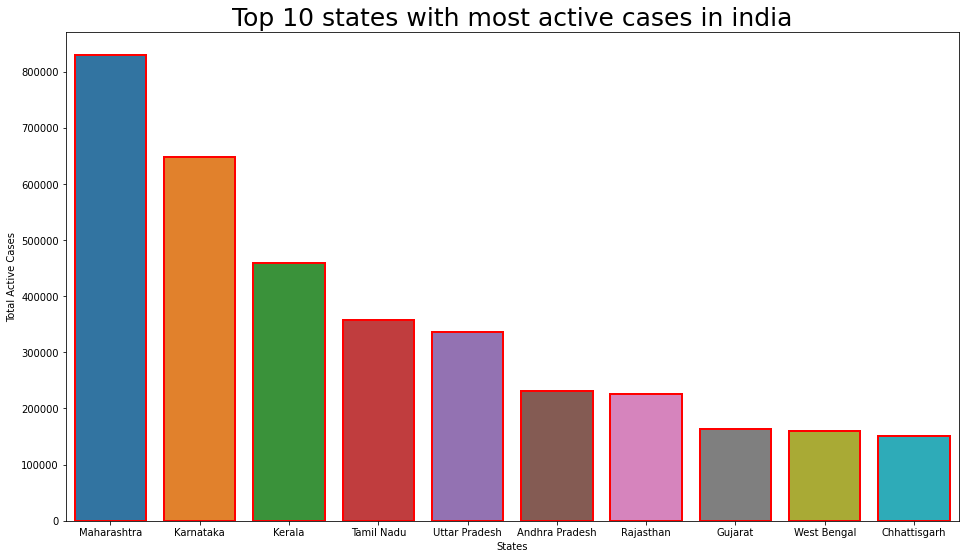

In [30]:
#top 10 active cases by states
top_10_active_cases=covid_df.groupby(by="State/UnionTerritory").max()[["Active_cases","Date"]].sort_values(by=["Active_cases"],ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in india",size=25)
ax=sns.barplot(data=top_10_active_cases.iloc[:10],y="Active_cases",x="State/UnionTerritory",linewidth=2,edgecolor="red")
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

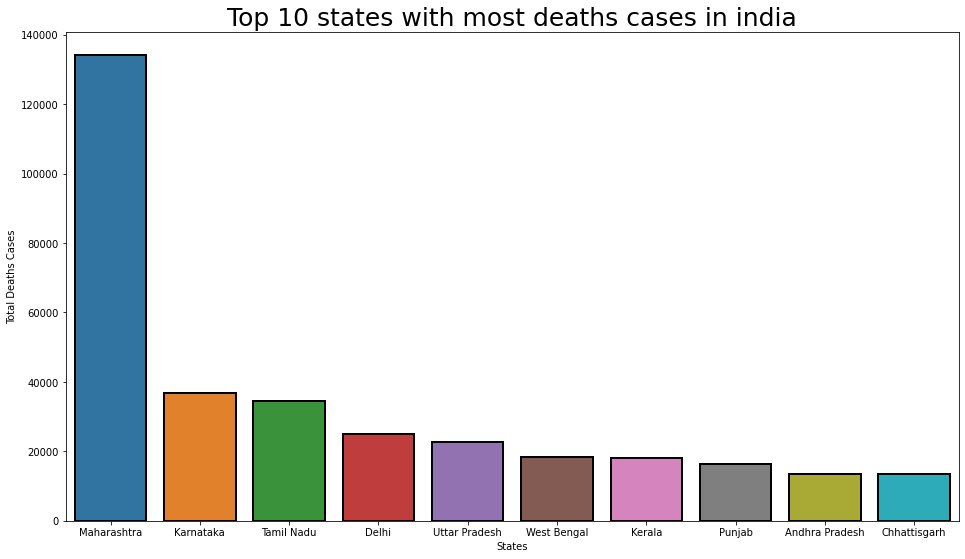

In [31]:
#to 10 state with highest death
top_10_deaths_states=covid_df.groupby(by="State/UnionTerritory").max()[["Deaths","Date"]].sort_values(by=["Deaths"],ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 states with most deaths cases in india",size=25)
ax=sns.barplot(data=top_10_deaths_states.iloc[:10],y="Deaths",x="State/UnionTerritory",linewidth=2,edgecolor="black")
plt.xlabel("States")
plt.ylabel("Total Deaths Cases")
plt.show()


Text(0.5, 1.0, 'Top 5 Affected state in india')

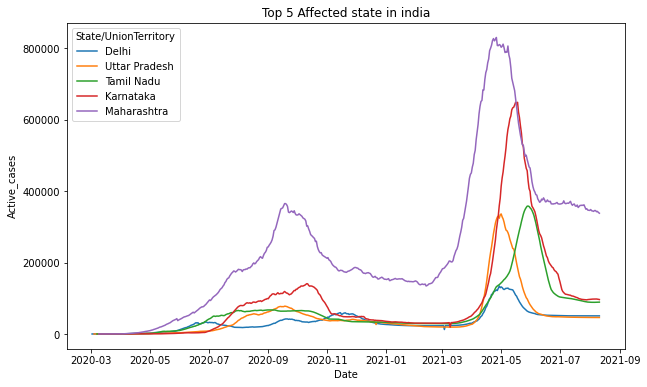

In [36]:
#Growth or the trend of active_cases to 5 state with most number of confirm cases 
fig=plt.figure(figsize=(10,6))
ax=sns.lineplot(data = covid_df[covid_df["State/UnionTerritory"].isin(["Maharashtra","Karnataka","Delhi","Tamil Nadu","Uttar Pradesh"])],x="Date",y="Active_cases",hue="State/UnionTerritory")
ax.set_title("Top 5 Affected state in india",size=12)

# Load Second Data Set covid_vaccine_statewise

In [33]:
vaccine_df=pd.read_csv("/content/drive/MyDrive/Python project/covid_vaccine_statewise.csv")

In [37]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [38]:
#check size of the data set
vaccine_df.shape

(7845, 24)

In [39]:
#check columns present in data set
vaccine_df.columns

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [42]:
#rename the updated on column to vaccine date
vaccine_df.rename(columns={"Updated On" : "Vaccine_Date"},inplace=True)

In [45]:
#Get information about data set
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [47]:
#chek null values present in each column
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [48]:
#drop few unimportant columns of null value present in data set
vaccination=vaccine_df.drop(columns=["Sputnik V (Doses Administered)","AEFI","18-44 Years (Doses Administered)","45-60 Years (Doses Administered)","60+ Years (Doses Administered)"],axis=1)

In [49]:
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [53]:
#male vs female vacination 
male=vaccination["Male(Individuals Vaccinated)"].sum()
female=vaccination["Female(Individuals Vaccinated)"].sum()
px.pie(names=["male","female"],values=[male,female],title="Male and Female Vaccination")

In [56]:
#drop all those rows wheren state= india
vaccine=vaccine_df[vaccine_df.State!="India"]
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [58]:
#rename the column total indidual vaccinated into total
vaccine.rename(columns={"Total Individuals Vaccinated":"Total"},inplace=True)

In [59]:
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [63]:
#Most vaccinate state
max_vac=vaccine.groupby("State")["Total"].sum().to_frame("Total")
max_vac=max_vac.sort_values("Total",ascending=False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


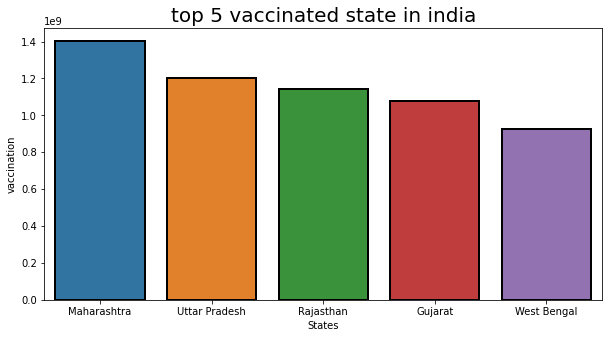

In [66]:
#visualize the top 5 vaccinated state
fig=plt.figure(figsize=(10,5))
plt.title("top 5 vaccinated state in india",size=20)
ax=sns.barplot(data=max_vac.iloc[:10],y=max_vac.Total,x=max_vac.index,linewidth=2,edgecolor="black")
plt.xlabel("States")
plt.ylabel("vaccination")
plt.show()

In [76]:
#less 5 vaccinate state
min_vac=vaccine.groupby("State")["Total"].sum().to_frame("Total")
min_vac=min_vac.sort_values("Total",ascending=False)[-1:-6:-1]
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


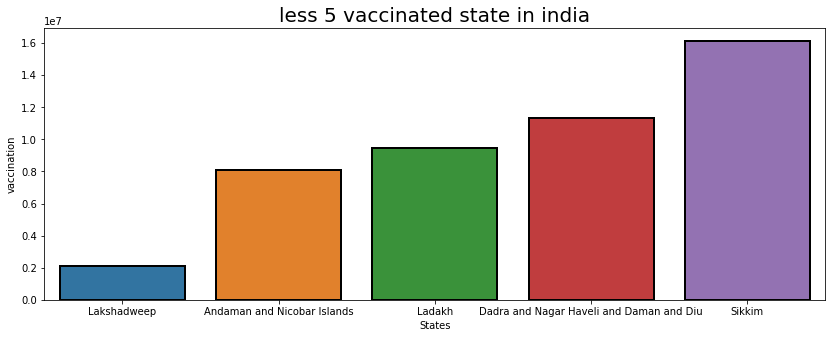

In [79]:
#visualize less 5 vaccinated state
fig=plt.figure(figsize=(14,5))
plt.title("less 5 vaccinated state in india",size=20)
ax=sns.barplot(data=min_vac.iloc[:10],y=min_vac.Total,x=min_vac.index,linewidth=2,edgecolor="black")
plt.xlabel("States")
plt.ylabel("vaccination")
plt.show()